In [1]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/aqc/dev'

Mounted at /content/drive/
/content/drive/MyDrive/physics/aqc/dev


In [2]:
import cupy
import numpy as np
from matplotlib import pyplot as plt

from aqc.aqc import AQC
from aqc.sources import GaussianSource
from aqc.pathes import IdenticalPhaseScreensPath
from aqc.phase_screens import SUPhaseScreen
from aqc.pupils import CirclePupil
from aqc.grid import RectGrid, RandLogPolarGrid

from aqc.simulations import SFSimulation, SISimulation, BeamPropagationSimulation, EtaSimulation, PDTSimulation
from aqc.measures import I
from aqc.theory.atmosphere import get_rytov2
from aqc.theory.models import MVKModel, KModel, TModel
from aqc.utils import pp

In [3]:
channel = AQC(
  grid=RectGrid(
    resolution=2**10, 
    delta=0.005
  ),
  source=GaussianSource(
      wvl=808e-9,
      w0=18e-2 / 2,
      F0=np.inf
  ),
  path=IdenticalPhaseScreensPath(
    phase_screen=SUPhaseScreen(
      model=MVKModel(
        Cn2=1e-16,
        l0=6e-3,
        L0=1e3,
      ),
      f_grid=RandLogPolarGrid(
        points=2**10, 
        f_min=1 / 1e3 / 15, 
        f_max=1 / 1e-3 * 2
      )
    ),
    length=140e3,
    count=20
  ),
  pupil=CirclePupil(
    radius=1
  ),
  use_GPU=True
)

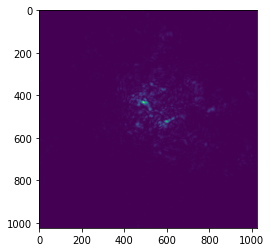

In [9]:
cupy.random.seed(seed=1)
plt.figure(figsize=(4,4))
plt.imshow(I(channel, pupil=False).get())

In [ ]:
SR = np.sqrt(get_rytov2(channel.path.phase_screen.model.Cn2, channel.source.k, channel.path.length))
print("Rytov parameter: ", pp(SR))

Rytov parameter:  6.05


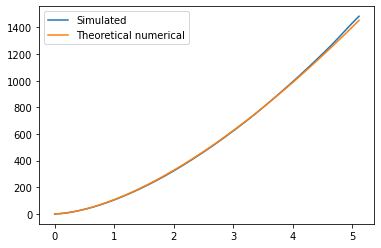

Iteration: 51


In [ ]:
sf_simulation = SFSimulation(channel.path.phase_screen, print_skip=2)
sf_simulation.run()

<Figure size 432x288 with 0 Axes>

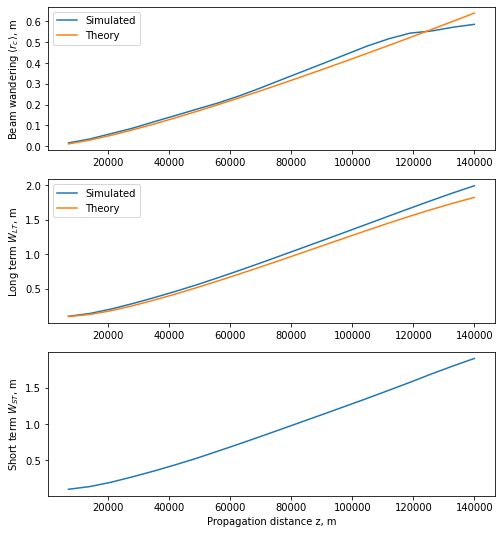

Iteration: 36


In [ ]:
bp_simulation = BeamPropagationSimulation(channel, print_skip=2)
bp_simulation.run()

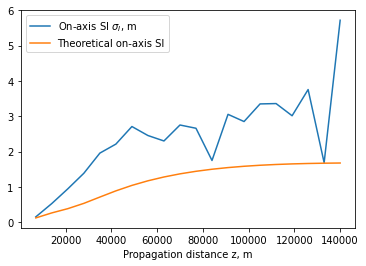

Iteration: 70


In [8]:
si_simulation = SISimulation(channel)
si_simulation.run()

<Figure size 432x288 with 0 Axes>

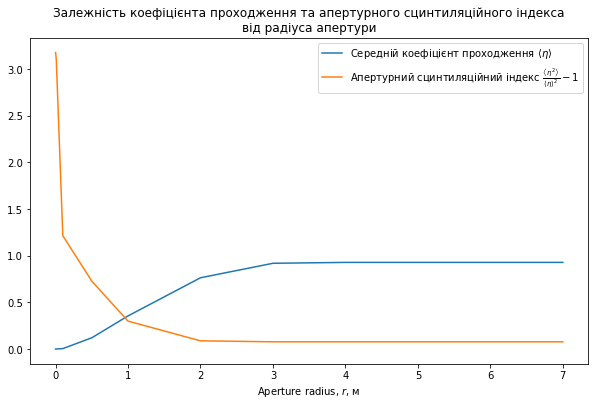

Iterations: 14


In [6]:
eta_simulation = EtaSimulation(channel, radiuses=[0, .000001, .00001, .0001, .001, .01, .1, .5, 1, 2, 3, 4, 5, 6, 7])
eta_simulation.run()